In [ ]:
features = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "Population",
    "AveOccup",
    "Latitude",
    "Longitude",
    "MedHouseVal"
]
feature_value_name = [
    "Rendimento Mediano",
    "Mediana Idade Casas",
    "Média de Divisões",
    "Média de Quartos",
    "Total de população",
    "Média de membros por habitação",
    "Latitude Geográfica",
    "Longiute Geográfica",
    "Mediana dos preços"
]

# --- change here ---
ratio = "1.00"
filename = "synth data california 1.0.pkl"
# -------------------

base_path = f"ratio {ratio}"
load_path = f"{base_path}/{filename}"

In [18]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target

import pickle
with open(load_path , "rb") as f:
    synth_data = pickle.load(f)
    print(synth_data.keys())

n_features = X.shape[1]

dict_keys(['GAN', 'CTGAN', 'COPULAGAN', 'VAE', 'TVAE', 'DDPM'])


In [19]:
print(X.shape)

(20640, 8)


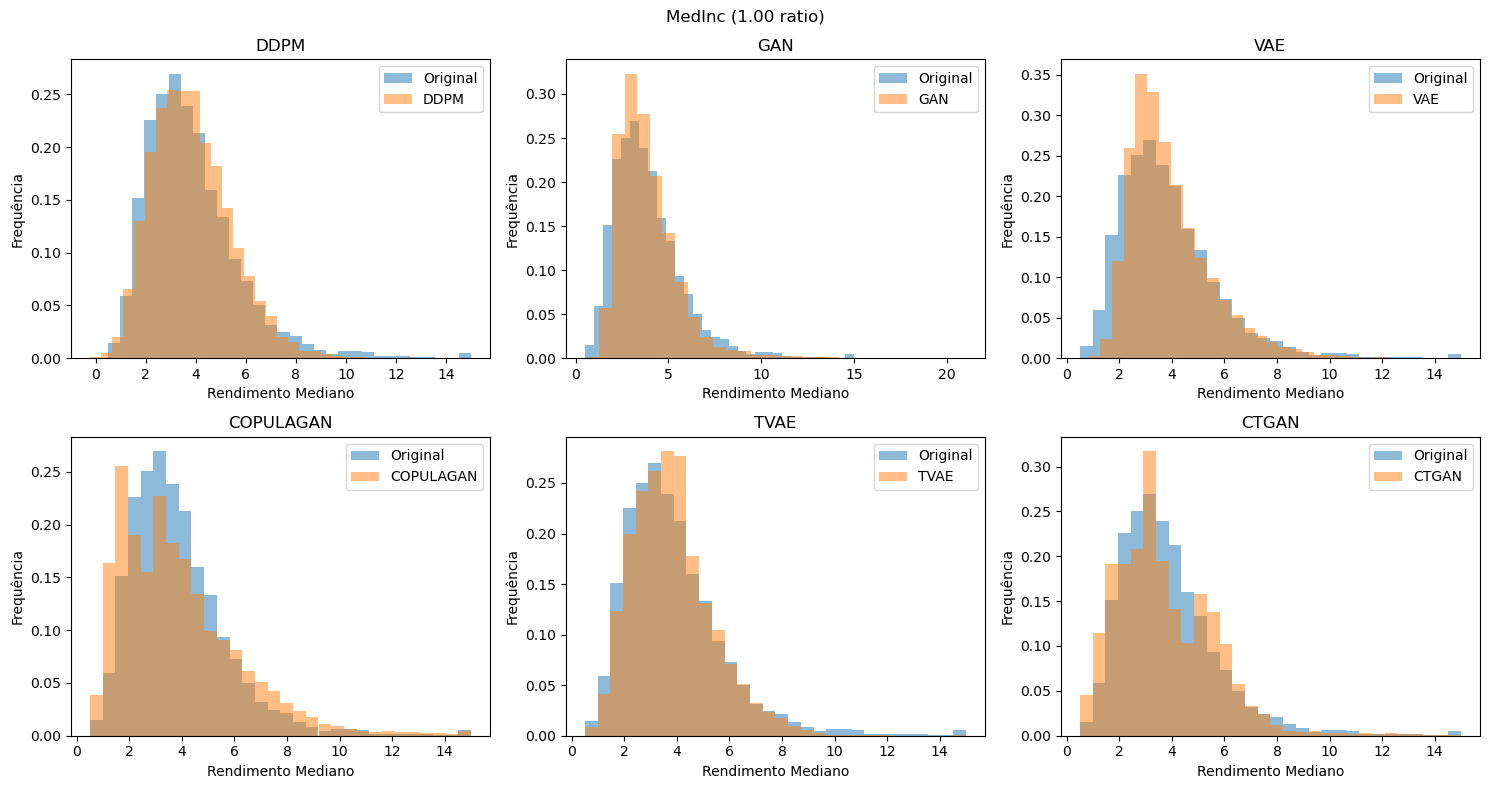

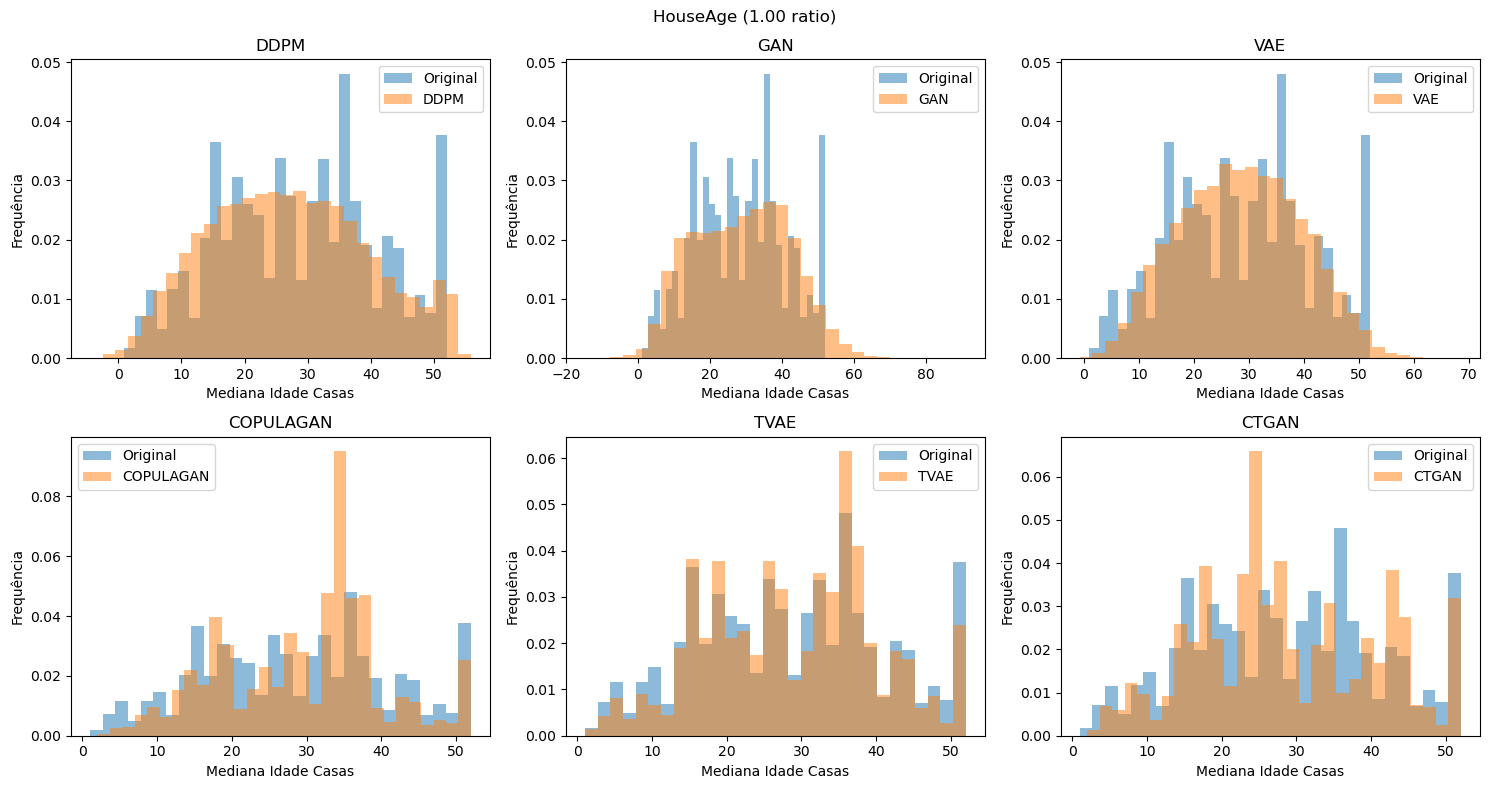

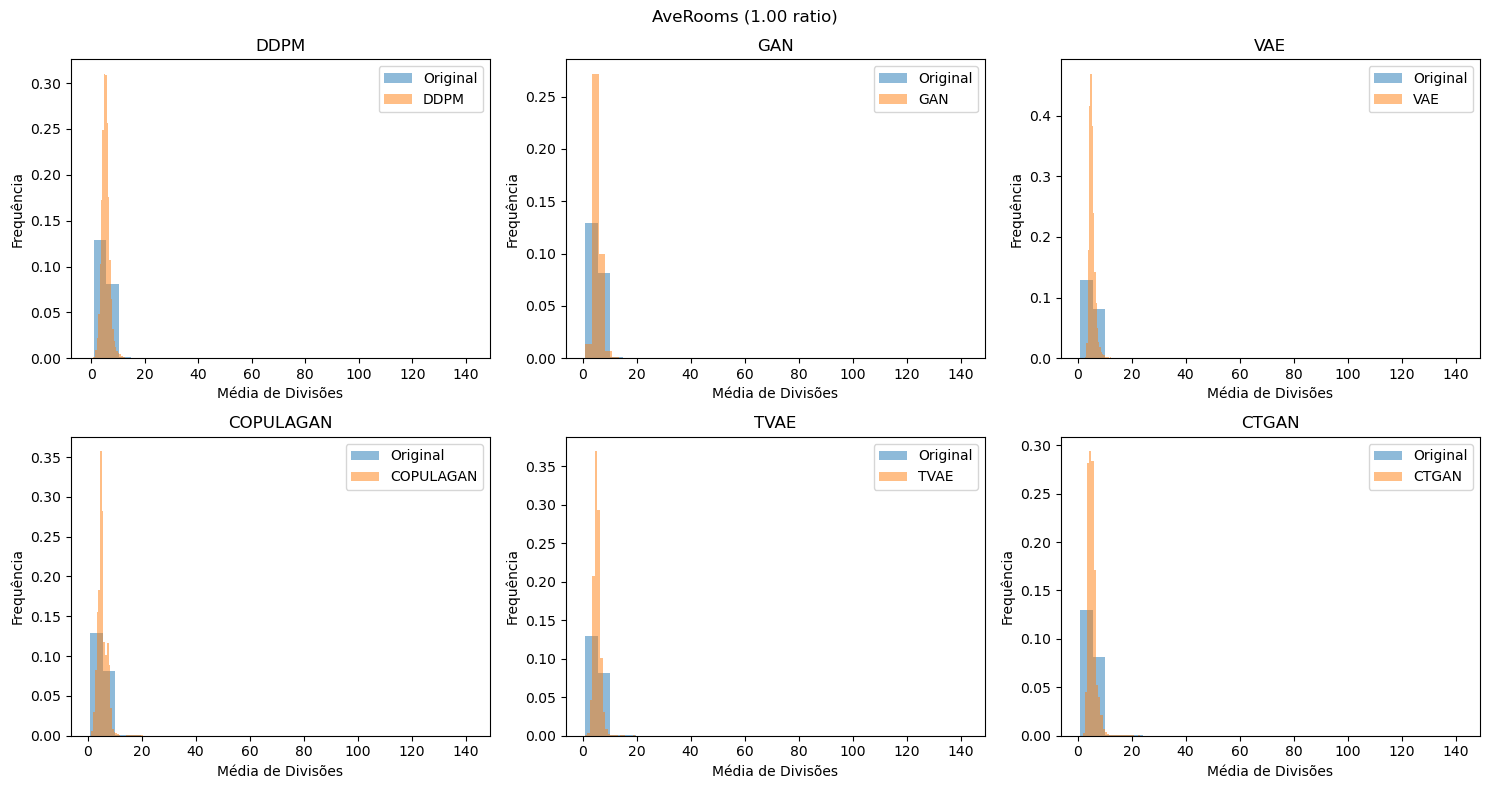

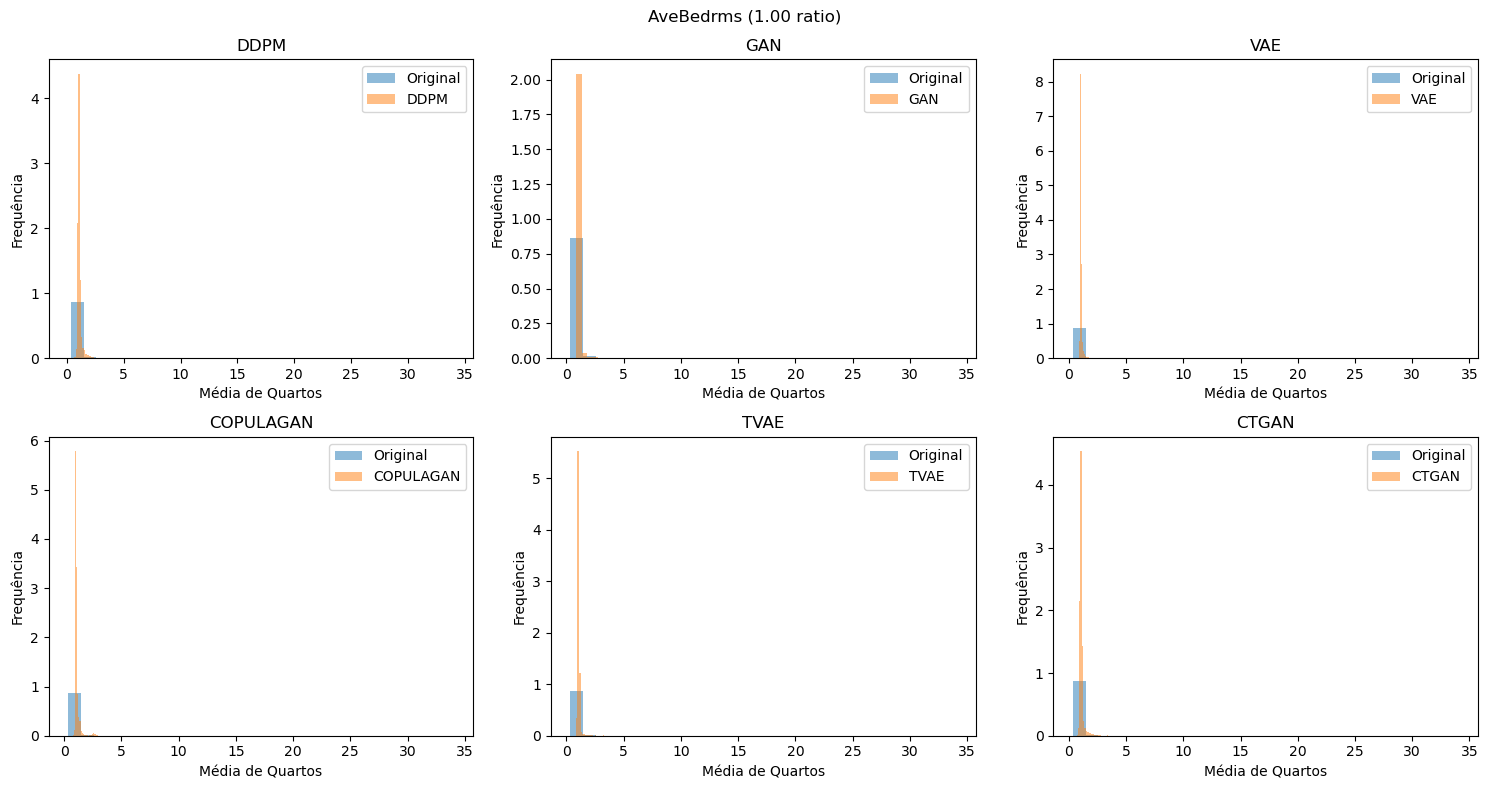

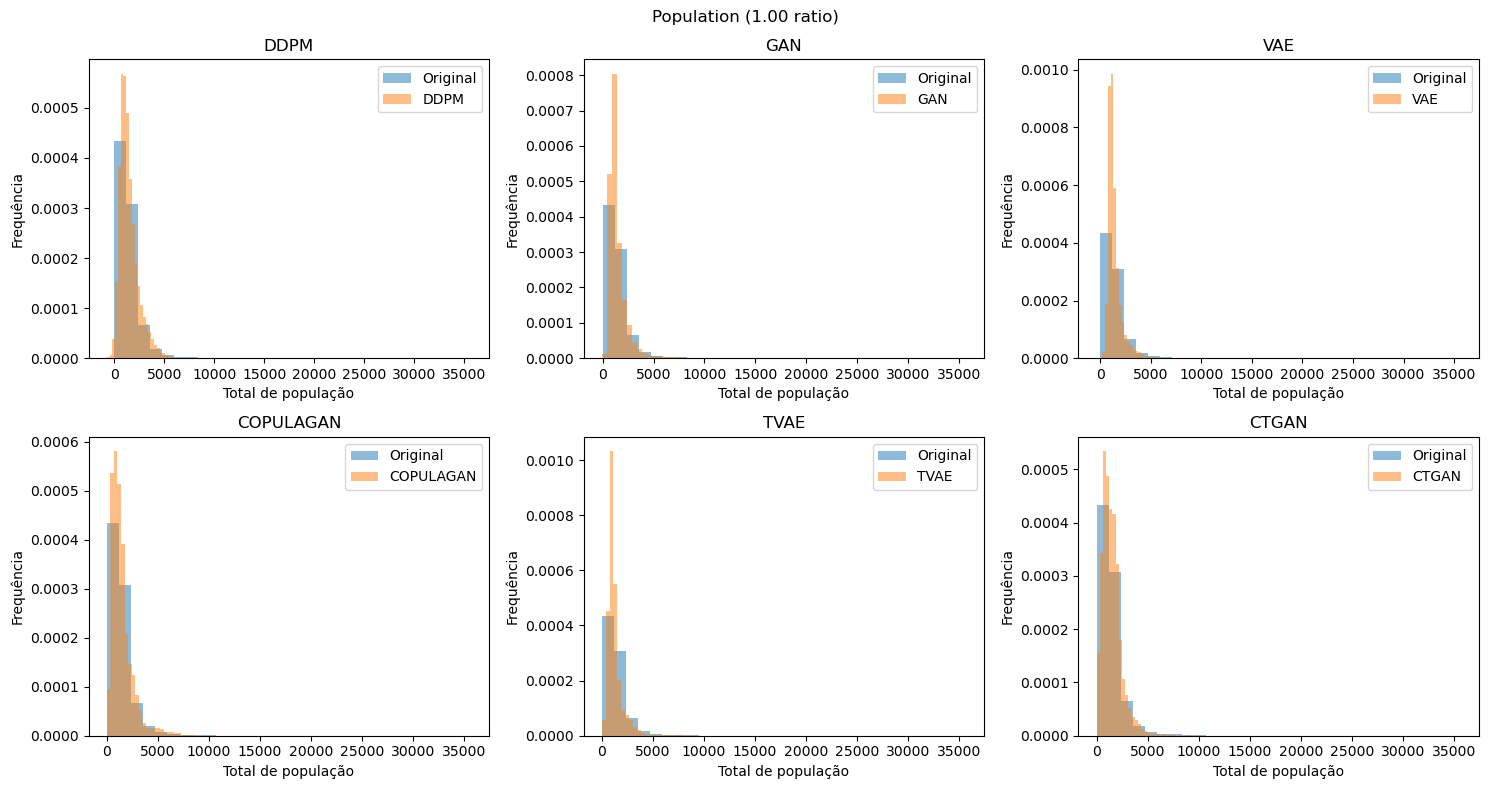

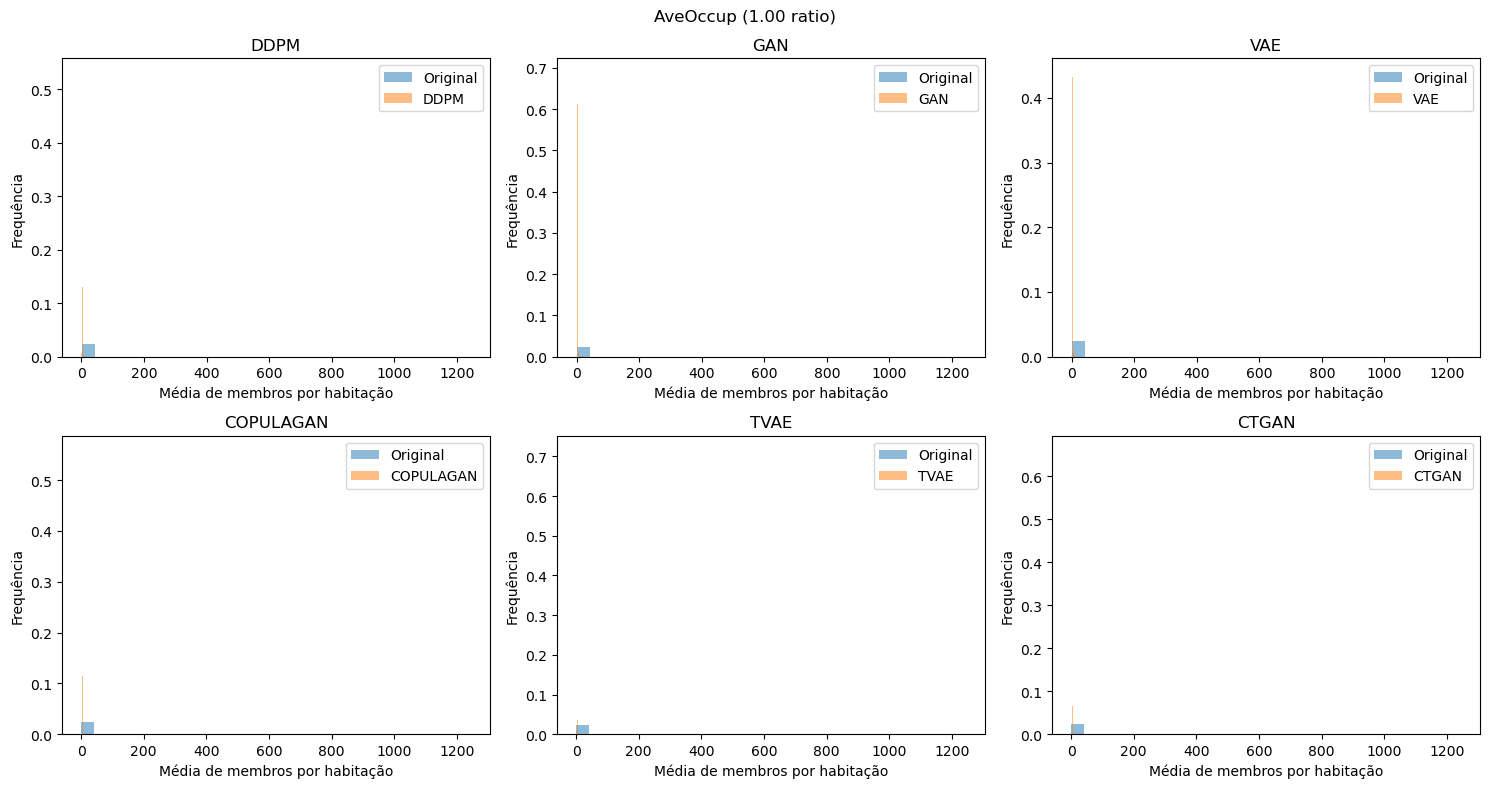

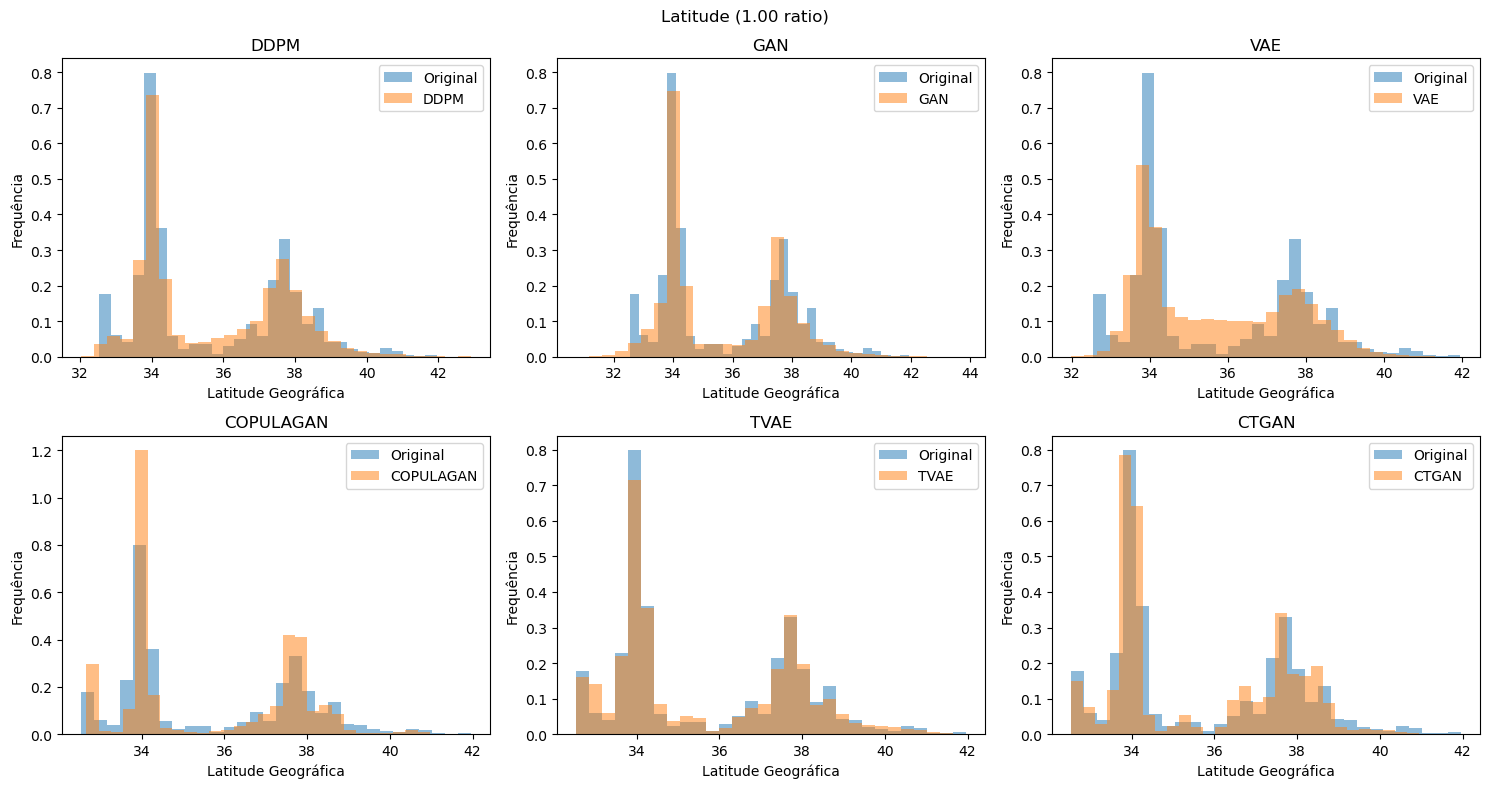

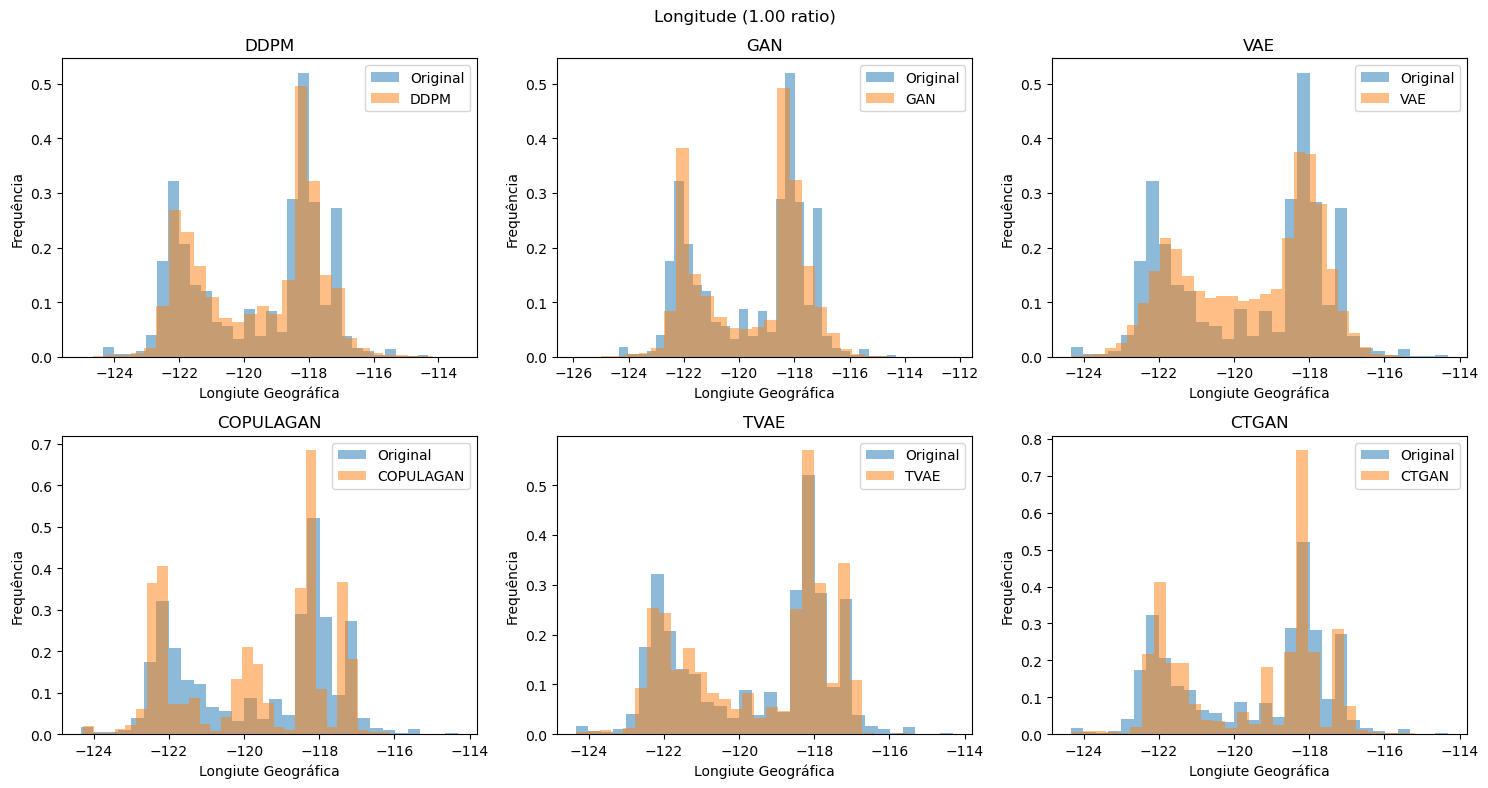

In [20]:
import matplotlib.pyplot as plt

models = {
    "DDPM": synth_data["DDPM"]["x"],
    "GAN": synth_data["GAN"]["x"],
    "VAE": synth_data["VAE"]["x"],
    "COPULAGAN": synth_data["COPULAGAN"]["x"],
    "TVAE": synth_data["TVAE"]["x"],
    "CTGAN": synth_data["CTGAN"]["x"],
}

x_axis_names = feature_value_name
y_axis_names = ["Frequência"] * n_features

for i in range(n_features):
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()

    for ax, (name, data) in zip(axes, models.items()):
        ax.hist(X[:, i], bins=30, density=True, alpha=0.5, label="Original")
        ax.hist(data[:, i], bins=30, density=True, alpha=0.5, label=name)
        ax.set_title(name)
        ax.set_xlabel(x_axis_names[i])
        ax.set_ylabel(y_axis_names[i])
        ax.legend()
    
    fig.suptitle(f"{features[i]} ({ratio} ratio)")
    plt.tight_layout()
    image_filename = f"synth ratio {ratio} {features[i]}.png"
    plt.savefig(f"{base_path}/{image_filename}")
    plt.show()